In [15]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load Data

In [16]:
train_data = FashionMNIST(root='./Data', download=True, train=True, transform=transforms.ToTensor())

class_names = train_data.classes

# Create a data loader
train_loader = DataLoader(train_data, batch_size=1, shuffle=False)

# Get Sample Image For Each Class

In [17]:
image_per_class = [[] for _ in range(10)]
for image, label in train_loader:
    if sum(len(item) for item in image_per_class) == 50:
        break
    if len(image_per_class[label])<5:
        image_per_class[label].append(image)

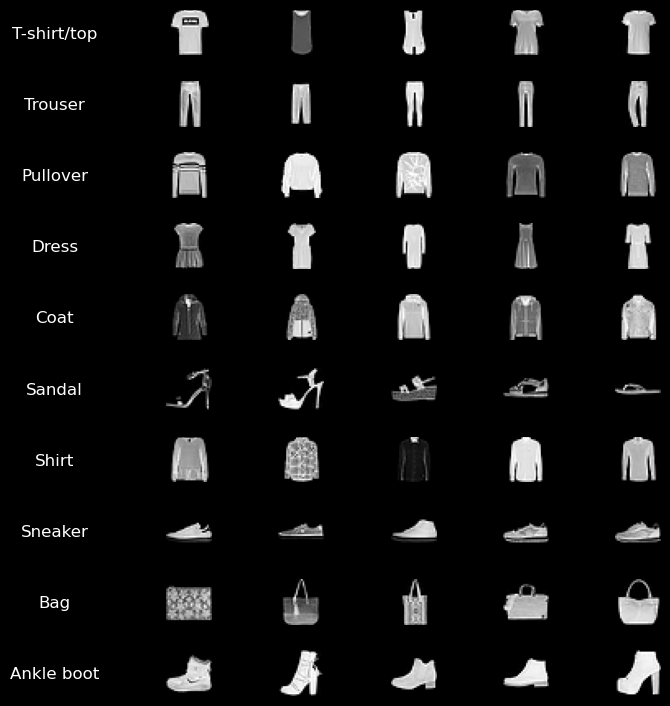

In [18]:
fig = plt.figure(figsize=(7,7))

subfigs = fig.subfigures(nrows=10, ncols=1, wspace=0.1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'{class_names[row]}', y=0.6, x=0)

    axs = subfig.subplots(nrows=1, ncols=5, sharey=True)
    for col, ax in enumerate(axs):
        ax.imshow(image_per_class[row][col].squeeze(0).permute([1,2,0]), cmap='gray')
        ax.axis('off')
        
plt.show()

# Get Class Distribution

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data.data, train_data.targets, test_size = 5000, stratify = train_data.targets, random_state = 10)

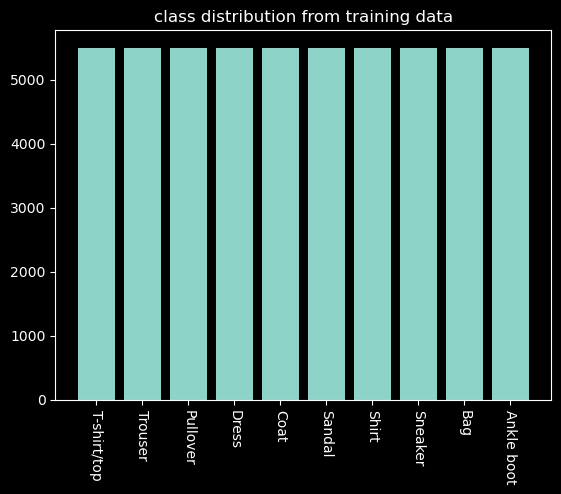

In [20]:
values, counts = y_train.unique(return_counts=True)
plt.bar(values, counts)
plt.xticks(values, class_names, rotation = -90)
plt.title("class distribution from training data")
plt.show()

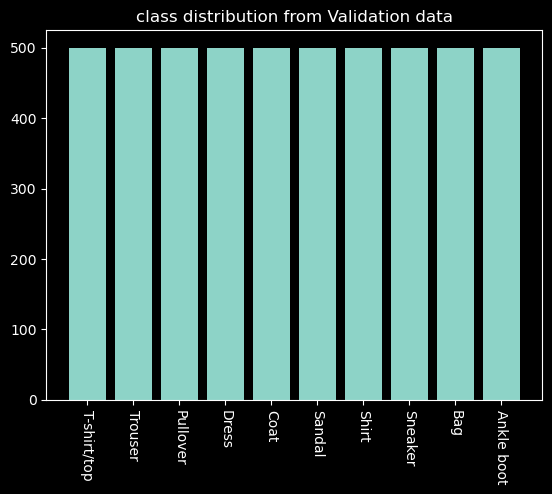

In [21]:
values, counts = y_val.unique(return_counts=True)
plt.bar(values, counts)
plt.xticks(values, class_names, rotation = -90)
plt.title("class distribution from Validation data")
plt.show()